In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
# Load the shp file
oklahoma_map = gpd.read_file('Igismap/UnitedStates_Boundary.shp')

# earthquake data
inputdir = "datasets/EarthquakeData"
all_earthquake_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_csv(os.path.join(root, filename))
        all_earthquake_df = all_earthquake_df.append(df, ignore_index=True)

In [ ]:
# set origintime as index
all_earthquake_df['origintime'] = all_earthquake_df['origintime'].astype('datetime64')
all_earthquake_df = all_earthquake_df.set_index('origintime')

In [127]:
all_earthquake_df.sort_values(by='origintime')  # 2005-10-28 -- 2021-05-05

event_id  magnitude magnitude_source max_mmi   latitude  \
origintime                                                                     
2000-06-18 15:54:30         0        2.2              OGS    None  34.917000   
2000-10-08 10:16:25         0        2.4              OGS       5  35.391000   
2000-11-10 00:14:31         0        2.4              OGS    None  35.824000   
2000-11-11 00:14:32         0        2.4              OGS    None  34.774000   
2001-01-27 00:57:54         0        2.3              OGS    None  34.640000   
...                       ...        ...              ...     ...        ...   
2021-05-30 04:02:02     48969        2.3              OGS    None  36.532452   
2021-05-30 15:26:45     48978        2.4              OGS    None  35.102898   
2021-05-30 22:07:46     48985        2.3              OGS    None  34.627842   
2021-05-31 02:05:44     48989        2.6              OGS    None  36.274757   
2021-05-31 18:49:54     48995        2.3              OGS    None  35.089870   

                     longitude  depth_km err_lat err_lon err_depth  \
origintime                                                           
2000-06-18 15:54:30 -98.186000      2.28    None    None      None   
2000-10-08 10:16:25 -97.941000      5.00    None    None      None   
2000-11-10 00:14:31 -98.255000      5.00    None    None      None   
2000-11-11 00:14:32 -97.806000      0.98    None    None      None   
2001-01-27 00:57:54 -95.952000      5.19    None    None      None   
...                        ...       ...     ...     ...       ...   
2021-05-30 04:02:02 -98.980141      3.08    1.56    1.54      1.33   
2021-05-30 15:26:45 -95.335548      0.86    6.41    3.64      3.48   
2021-05-30 22:07:46 -96.307716      0.75     3.9    3.03      2.73   
2021-05-31 02:05:44 -97.709076      1.56    0.96    0.84      1.12   
2021-05-31 18:49:54 -95.342644      5.00     4.5    2.99       0.0   

                    err_origintime     state     county       status  
origintime                                                            
2000-06-18 15:54:30           None      None      CADDO         None  
2000-10-08 10:16:25           None      None   CANADIAN         None  
2000-11-10 00:14:31           None      None     BLAINE         None  
2000-11-11 00:14:32           None      None      GRADY         None  
2001-01-27 00:57:54           None      None      ATOKA         None  
...                            ...       ...        ...          ...  
2021-05-30 04:02:02     0.29056252  Oklahoma   Woodward  Preliminary  
2021-05-30 15:26:45     0.86833805  Oklahoma  Pittsburg  Preliminary  
2021-05-30 22:07:46      0.7425026  Oklahoma       Coal  Preliminary  
2021-05-31 02:05:44     0.17720415  Oklahoma   Garfield  Preliminary  
2021-05-31 18:49:54     0.73286806  Oklahoma  Pittsburg  Preliminary  

[26156 rows x 14 columns]

In [128]:
# earthquake_df = all_earthquake_df
start = "2000"
# end = "2019"
earthquake_df = all_earthquake_df.loc[start:]

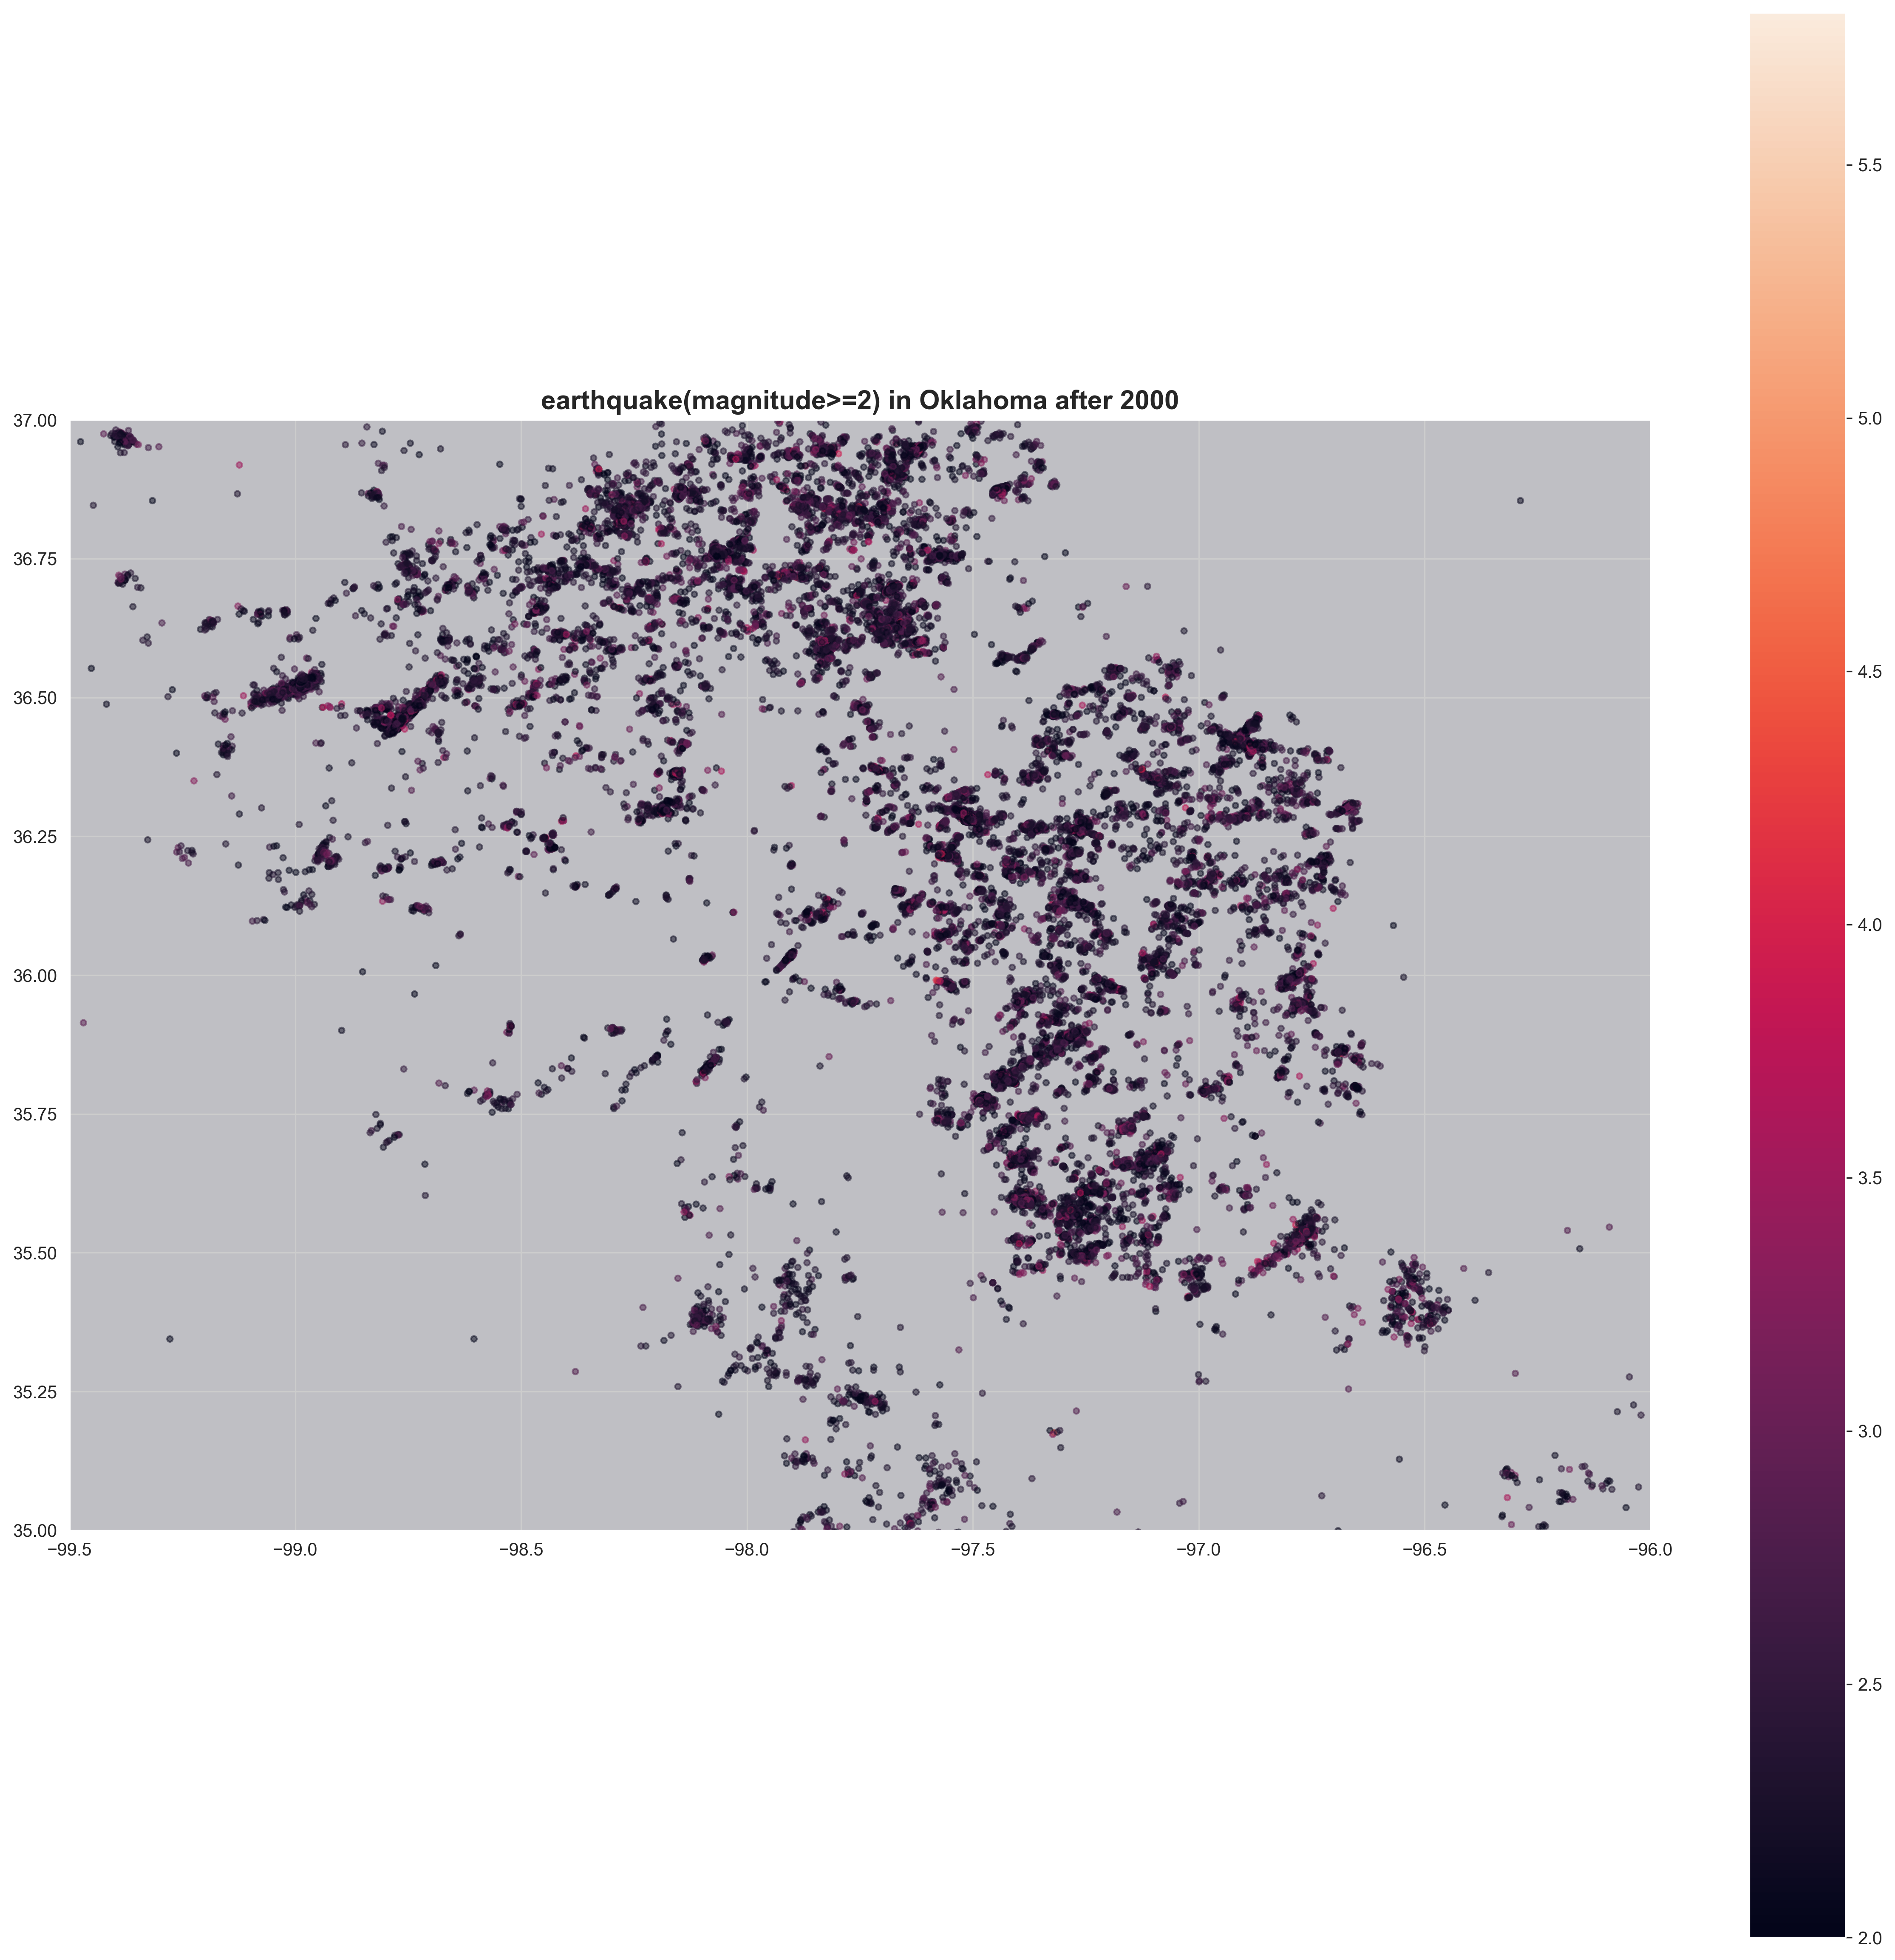

In [129]:
# zip x and y coordinates into single feature
earthquake_geometry = [Point(xy) for xy in zip(earthquake_df['longitude'], earthquake_df['latitude'])]

# create GeoPandas dataframe
earthquake_geo_df = gpd.GeoDataFrame(earthquake_df, crs = "EPSG:4326", geometry = earthquake_geometry) #4326 is the code for a lat,long coordinate system

# earthquake 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘magnitude’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
earthquake_geo_df.plot(column='magnitude',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('earthquake(magnitude>=2) in Oklahoma after ' + start, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-99.5, -96)
plt.ylim(35, 37)
# plt.xlim(-98, -97.5)
# plt.ylim(36.5, 37)
# show map
plt.show()

# Year injection

In [130]:
# injection data
inputdir = "datasets/OCC_injection_data/YearlyInjectionRecords"
# inputdir = "datasets/OCC_injection_data/MonthlyInjectionRecords"
yearly_injection_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_excel(os.path.join(root, filename))
        yearly_injection_df = yearly_injection_df.append(df, ignore_index=True)

In [131]:
yearly_injection_df['Year Vol'] = yearly_injection_df['Jan Vol'] + \
                                yearly_injection_df['Feb Vol'] + \
                                yearly_injection_df['Mar Vol'] + \
                                yearly_injection_df['Apr Vol'] + \
                                yearly_injection_df['May Vol'] + \
                                yearly_injection_df['Jun Vol'] + \
                                yearly_injection_df['Jul Vol'] + \
                                yearly_injection_df['Aug Vol'] + \
                                yearly_injection_df['Sep Vol'] + \
                                yearly_injection_df['Oct Vol'] + \
                                yearly_injection_df['Nov Vol'] + \
                                yearly_injection_df['Dec Vol']

yearly_injection_df = yearly_injection_df.dropna(subset=["LAT", "LON"])

In [132]:
# Set Report_Date as index
yearly_injection_df = yearly_injection_df.set_index('ReportYear')

In [141]:
yearly_injection_df.sort_values(by='ReportYear')

API                    OperatorName  \
ReportYear                                               
2011-01-01  3514727816       GATEWAY RESOURCES USA INC   
2011-01-01  3512302139  CITATION OIL & GAS CORPORATION   
2011-01-01  3512302151  CITATION OIL & GAS CORPORATION   
2011-01-01  3512302159           7C LAND & MINERALS CO   
2011-01-01  3512302167               FDL OPERATING LLC   
...                ...                             ...   
2019-07-01  3507124656  TONKAWA SALTWATER DISPOSAL LLC   
2019-07-01  3513720816         JOHNSON OIL COMPANY INC   
2019-07-01  3505124403           KYBENCO DISPOSALS LLC   
2019-07-01  3501123776      LAGOON WATER LOGISTICS LLC   
2019-07-01  3507325538           RED HAWK DISPOSAL LLC   

                                          WellName WellNumber  Status  \
ReportYear                                                              
2011-01-01                      RALPH WILLIAMS SWD         60    OPEN   
2011-01-01                         EAST FITTS UNIT     14A1-1    OPEN   
2011-01-01             EAST FITTS UNIT (BATES A#1)     25A-1A    OPEN   
2011-01-01                     BLANKENSHIP GIBBONS          1    OPEN   
2011-01-01  FITTS WEST UNIT (SHAFFER 6) (FWU 1111)       20-6    OPEN   
...                                            ...        ...     ...   
2019-07-01                             TONKAWA SWD          1    OPEN   
2019-07-01                  EVWBSSU                    S-5       OPEN   
2019-07-01                               GRACY SWD          1    OPEN   
2019-07-01                            SLO-POKE SWD          1    OPEN   
2019-07-01                            RED HAWK SWD      2-17H  CLOSED   

           WellStatus WellType        LAT        LON      County  ...  \
ReportYear                                                        ...   
2011-01-01         AC     2DNC  36.454506 -95.975436  WASHINGTON  ...   
2011-01-01         AC     2RIn  34.625888 -96.538393    PONTOTOC  ...   
2011-01-01         AC     2RIn  34.619141 -96.548243    PONTOTOC  ...   
2011-01-01         AC     2DNC  34.590318 -96.616073    PONTOTOC  ...   
2011-01-01         AC     2RIn  34.617289 -96.629317    PONTOTOC  ...   
...               ...      ...        ...        ...         ...  ...   
2019-07-01       ACRT     2DCm  36.691437 -97.292599         KAY  ...   
2019-07-01         AC     2DCm  34.444030 -97.587450    STEPHENS  ...   
2019-07-01         AC     2DCm  35.175349 -97.770231       GRADY  ...   
2019-07-01         AC     2DCm  35.986080 -98.477430      BLAINE  ...   
2019-07-01         AC     2DCm  36.119781 -97.972027  KINGFISHER  ...   

            Aug PSI   Sep Vol Sep PSI    Oct Vol Oct PSI   Nov Vol Nov PSI  \
ReportYear                                                                   
2011-01-01      0.0   11171.0     0.0    12417.0     0.0   10710.0     0.0   
2011-01-01      0.0    5553.0  1500.0     5043.0  1475.0    3137.0  1475.0   
2011-01-01   1510.0   49975.0  1550.0    46022.0  1450.0   47051.0  1550.0   
2011-01-01      0.0    2400.0     0.0     2480.0     0.0    2400.0     0.0   
2011-01-01   1436.0   30383.0  1416.0    32543.0  1378.0   33772.0  1349.0   
...             ...       ...     ...        ...     ...       ...     ...   
2019-07-01      0.0       0.0     0.0        0.0     0.0       0.0     0.0   
2019-07-01      0.0   36423.0     0.0    27634.0     0.0   21472.0     0.0   
2019-07-01      0.0       0.0     0.0        0.0     0.0       0.0     0.0   
2019-07-01   1690.0  143783.0  1729.0  1445580.0  1742.0  117045.0  1705.0   
2019-07-01    758.0   65846.0   567.0   124846.0   608.0   92795.0   651.0   

             Dec Vol  Dec PSI   Year Vol  
ReportYear                                
2011-01-01   11804.0      0.0   131799.0  
2011-01-01    4786.0   1475.0    18519.0  
2011-01-01   48184.0   1550.0   603597.0  
2011-01-01    2480.0      0.0    29200.0  
2011-01-01   34403.0   1344.0   256057.0  
...              ...      ...        ...  
2019-

In [142]:
# injection_df = monthly_injection_df
start = "2010"
end = "2021"
injection_df = yearly_injection_df.loc[start:end]

In [143]:
injection_df.shape

(99441, 56)

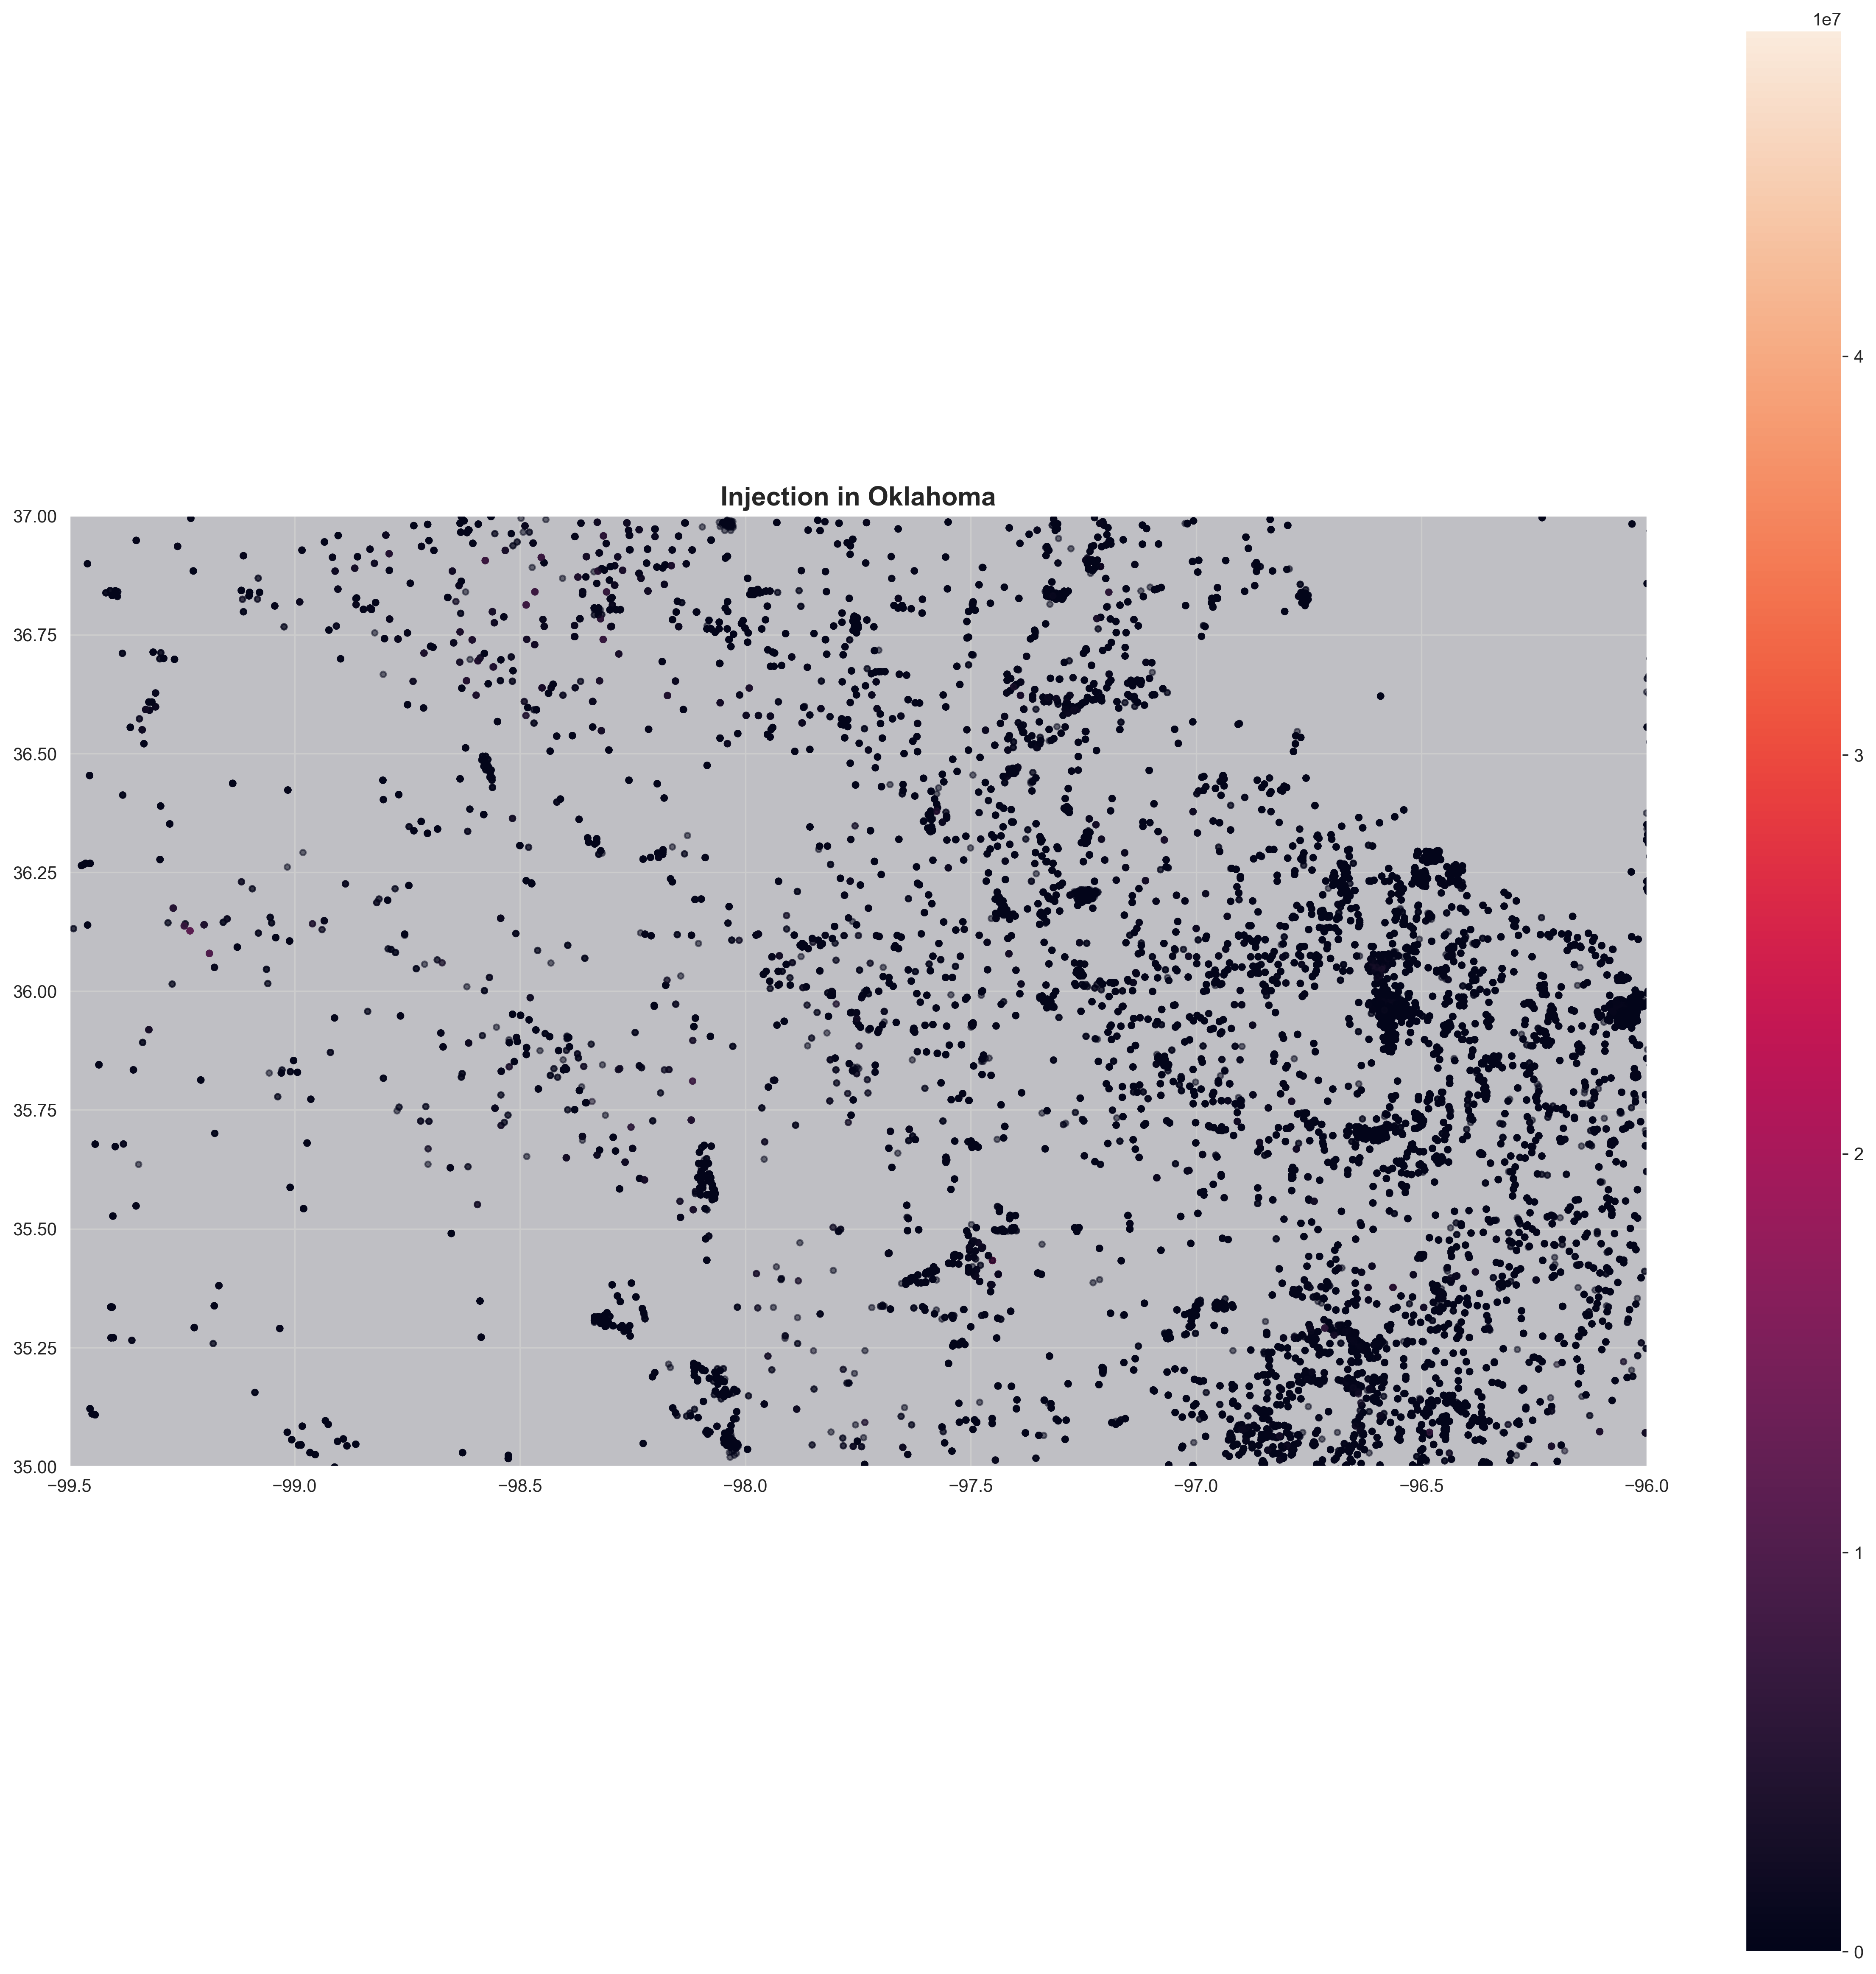

In [144]:
# zip x and y coordinates into single feature
injection_geometry = [Point(xy) for xy in zip(injection_df['LON'], injection_df['LAT'])]

# create GeoPandas dataframe
injection_geo_df = gpd.GeoDataFrame(injection_df, crs = "EPSG:4326", geometry = injection_geometry)

# Injection 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Volume_BPD’ variaable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
injection_geo_df.plot(column='Year Vol',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Injection in Oklahoma between '+start+' and '+end, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-99.5, -96)
plt.ylim(35, 37)
# plt.xlim(-98, -97.5)
# plt.ylim(36.5, 37)
# show map
plt.show()

# well

In [145]:
inputdir = "datasets/WellData/"
all_well_df = pd.read_csv(inputdir + "Export - Excel Well Workbook_Header.csv")

all_well_df['Permit Date'] = all_well_df['Permit Date'].astype('datetime64')
all_well_df = all_well_df.dropna(subset=["Permit Date", "Depth Total Projected", "Surface Latitude", "Surface Longitude"])
# Set Report_Date as index
all_well_df = all_well_df.set_index('Permit Date')

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24,28,31,33,42,46,48,49,50,55,58,62,70,73,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [146]:
all_well_df.sort_values(by='Permit Date')

UWI Source    API Number  IC Number  Regulatory API  \
Permit Date                                                                 
1801-01-01   1.503570e+13     PI  1.503570e+13        NaN    1.503570e+13   
1801-01-01   1.501940e+13     PI  1.501940e+13        NaN    1.501940e+13   
1801-01-01   1.501540e+13     PI  1.501540e+13        NaN    1.501540e+13   
1801-01-01   1.501540e+13     PI  1.501540e+13        NaN    1.501540e+13   
1801-01-01   1.501540e+13     PI  1.501540e+13        NaN    1.501540e+13   
...                   ...    ...           ...        ...             ...   
2021-12-03   3.507330e+13     PI  3.507330e+13        NaN    3.507326e+09   
2021-12-03   1.501930e+13     PI  1.501930e+13        NaN    1.501930e+13   
2021-12-03   3.510920e+13     PI  3.510920e+13        NaN    3.510923e+09   
2021-12-05   3.514320e+13     PI  3.514320e+13        NaN    3.514324e+09   
2021-12-05   1.501520e+13     PI  1.501520e+13        NaN    1.501520e+13   

                               Operator Name  Operator City  \
Permit Date                                                   
1801-01-01                       WHEELER R M            NaN   
1801-01-01        ELMORE JOHN A & PATRICIA R            NaN   
1801-01-01                     VESS OIL CORP        WICHITA   
1801-01-01                     VESS OIL CORP        WICHITA   
1801-01-01                     VESS OIL CORP        WICHITA   
...                                      ...            ...   
2021-12-03               COTTONMOUTH SWD LLC          TULSA   
2021-12-03                         QUITO INC   BARTLESVILLE   
2021-12-03   STEPHENS & JOHNSON OPERATING CO  WICHITA FALLS   
2021-12-05             CALVERT OPERATING LLC  OKLAHOMA CITY   
2021-12-05                C & G DRILLING INC         EUREKA   

                       Current Operator Name Current Operator City  \
Permit Date                                                          
1801-01-01                       WHEELER R M                   NaN   
1801-01-01        ELMORE JOHN A & PATRICIA R                   NaN   
1801-01-01                     VESS OIL CORP               WICHITA   
1801-01-01                     VESS OIL CORP               WICHITA   
1801-01-01                     VESS OIL CORP               WICHITA   
...                                      ...                   ...   
2021-12-03               COTTONMOUTH SWD LLC                 TULSA   
2021-12-03                         QUITO INC          BARTLESVILLE   
2021-12-03   STEPHENS & JOHNSON OPERATING CO         WICHITA FALLS   
2021-12-05             CALVERT OPERATING LLC         OKLAHOMA CITY   
2021-12-05                C & G DRILLING INC                EUREKA   

                     Lease Name  ... Surface LL Source Proposed BH Latitude  \
Permit Date                      ...                                          
1801-01-01        ANDES CHESTER  ...                IH                  NaN   
1801-01-01   AMERICAN PETROLEUM  ...                IH                  NaN   
1801-01-01          KIRKPATRICK  ...                IH                  NaN   
1801-01-01          KIRKPATRICK  ...                IH                  NaN   
1801-01-01          KIRKPATRICK  ...                IH                  NaN   
...                         ...  ...               ...                  ...   
2021-12-03           MOJAVE SWD  ...                IH                  NaN   
2021-12-03            MCFARLAND  ...                IH                  NaN   
2021-12-03              SALSMAN  ...                IH            35.385346   
2021-12-05                  SWL  ...                IH                  NaN   
2021-12-05           BUSENITZ B  ...                IH                  NaN   

            Proposed BH Longitude Proposed BH LL Source BH Latitude  \
Permit Date                                                           
1801-01-01                    NaN                   NaN         NaN   
1801-01-01                    NaN               

In [147]:
# injection_df = monthly_injection_df
# start = "2010"
end = "2020"
well_df = all_well_df.loc[:end]

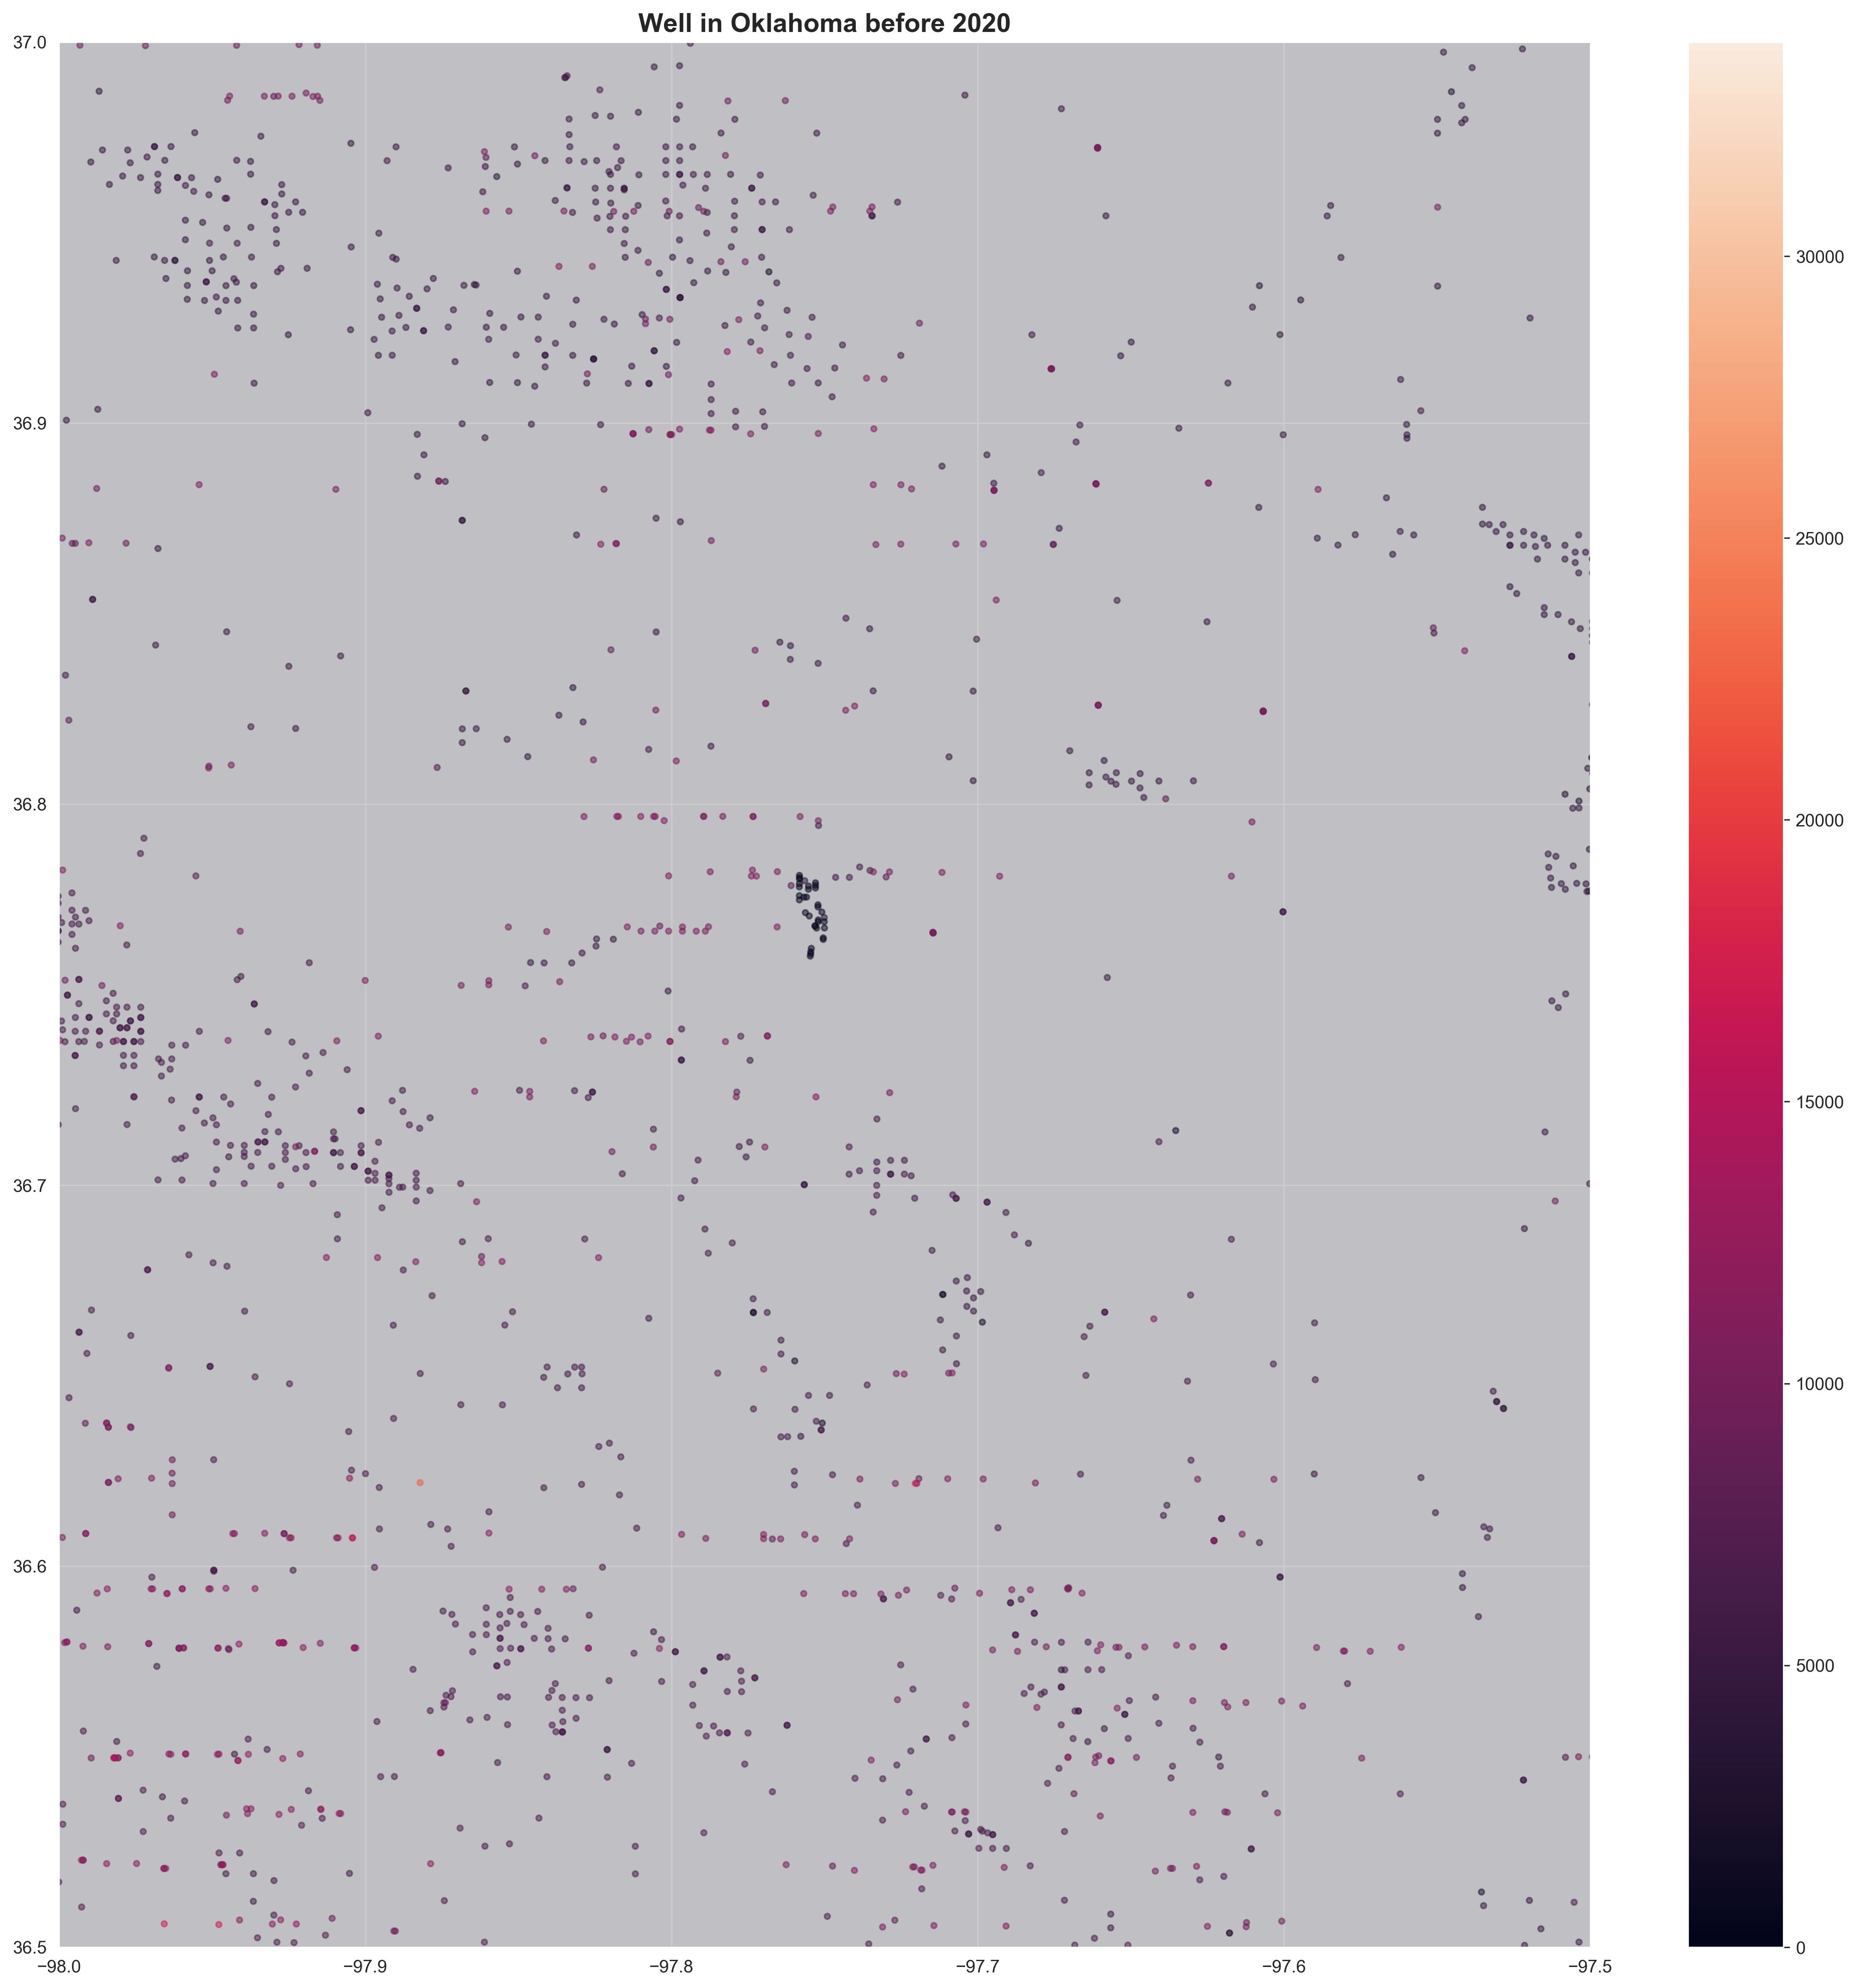

In [148]:
# zip x and y coordinates into single feature
well_geometry = [Point(xy) for xy in zip(well_df['Surface Longitude'], well_df['Surface Latitude'])]

# create GeoPandas dataframe
well_geo_df = gpd.GeoDataFrame(well_df, crs = "EPSG:4326", geometry = well_geometry)

# well 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Depth Total Projected’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
well_geo_df.plot(column='Depth Total Projected',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Well in Oklahoma before ' + end, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-103.5, -94)
# plt.ylim(33, 39)
plt.xlim(-98, -97.5)
plt.ylim(36.5, 37)
# show map
plt.show()

In [149]:
# 筛选出指定区域内的well
well_geo_df_subarea = well_geo_df[(well_geo_df['Surface Latitude']>36.5)&(well_geo_df['Surface Latitude']<37)&(well_geo_df['Surface Longitude']>-98)&(well_geo_df['Surface Longitude']<-97.5)]

In [150]:
well_geo_df_subarea

UWI Source    API Number  IC Number  Regulatory API  \
Permit Date                                                                 
1985-11-07   3.505320e+13     PI  3.505320e+13        NaN             NaN   
1985-07-23   3.505320e+13     PI  3.505320e+13        NaN             NaN   
1985-07-09   3.505320e+13     PI  3.505320e+13        NaN             NaN   
1985-07-19   3.505320e+13     PI  3.505320e+13        NaN             NaN   
1985-07-20   3.505320e+13     PI  3.505320e+13        NaN             NaN   
...                   ...    ...           ...        ...             ...   
2015-11-24   3.504730e+13     PI  3.504730e+13        NaN    3.504725e+09   
2016-04-13   3.504730e+13     PI  3.504730e+13        NaN    3.504725e+09   
2016-04-13   3.504730e+13     PI  3.504730e+13        NaN    3.504725e+09   
2017-04-05   3.504730e+13     PI  3.504730e+13        NaN    3.504725e+09   
2019-11-09   3.504730e+13     PI  3.504730e+13        NaN    3.504725e+09   

                                      Operator Name  Operator City  \
Permit Date                                                          
1985-11-07                           MOBIL OIL CORP            NaN   
1985-07-23                              GOOD VAUGHN            NaN   
1985-07-09                              GOOD VAUGHN            NaN   
1985-07-19                                  KSH INC            NaN   
1985-07-20                        CHEVRON U S A INC            NaN   
...                                             ...            ...   
2015-11-24                          SK PLYMOUTH LLC          TULSA   
2016-04-13   SANDRIDGE EXPLORATION & PRODUCTION LLC  OKLAHOMA CITY   
2016-04-13   SANDRIDGE EXPLORATION & PRODUCTION LLC  OKLAHOMA CITY   
2017-04-05                     ARROWHEAD ENERGY INC         EDMOND   
2019-11-09                             NEON GAS LLC         EDMOND   

                              Current Operator Name Current Operator City  \
Permit Date                                                                 
1985-11-07                     CHAPARRAL ENERGY LLC                   NaN   
1985-07-23                               W M A CORP                   NaN   
1985-07-09                    ANADARKO MINERALS INC                   NaN   
1985-07-19                  L & L SMITH ENERGY CORP                   NaN   
1985-07-20                        CHEVRON U S A INC                   NaN   
...                                             ...                   ...   
2015-11-24                          SK PLYMOUTH LLC                 TULSA   
2016-04-13   SANDRIDGE EXPLORATION & PRODUCTION LLC         OKLAHOMA CITY   
2016-04-13   SANDRIDGE EXPLORATION & PRODUCTION LLC         OKLAHOMA CITY   
2017-04-05                     ARROWHEAD ENERGY INC                EDMOND   
2019-11-09                             NEON GAS LLC                EDMOND   

                    Lease Name  ... Proposed BH Latitude  \
Permit Date                     ...                        
1985-11-07        LE FORCE `B`  ...                  NaN   
1985-07-23                KIRK  ...                  NaN   
1985-07-09               BULES  ...                  NaN   
1985-07-19       FORRESTER `A`  ...                  NaN   
1985-07-20   LEFORCE FARMS INC  ...                  NaN   
...                        ...  ...                  ...   
2015-11-24           TLZ RANCH  ...            36.534158   
2016-04-13         RICHEY 2407  ...            36.536157   
2016-04-13         RICHEY 2407  ...            36.536131   
2017-04-05               VENCL  ...                  NaN   
2019-11-09               MABRY  ...                  NaN   

            Proposed BH Longitude Proposed BH LL Source BH Latitude  \
Permit Date                                                           
1985-11-07                    NaN                   NaN         NaN   
1985-07-23                    NaN                   NaN         NaN   
1985-07-09                    NaN         

In [151]:
from shapely.geometry import Point
import geopandas
import geopy.distance

In [152]:
well_geo_df_subarea['geometry']

Permit Date
1985-11-07    POINT (-97.92161 36.71033)
1985-07-23    POINT (-97.70817 36.69744)
1985-07-09    POINT (-97.74200 36.70285)
1985-07-19    POINT (-97.75527 36.64479)
1985-07-20    POINT (-97.92270 36.70428)
                         ...            
2015-11-24    POINT (-97.71864 36.52022)
2016-04-13    POINT (-97.94157 36.54897)
2016-04-13    POINT (-97.94157 36.54897)
2017-04-05    POINT (-97.69678 36.52999)
2019-11-09    POINT (-97.77609 36.54804)
Name: geometry, Length: 1569, dtype: geometry

In [153]:
earthquake_geo_df['geometry']

origintime
2000-06-18 15:54:30    POINT (-98.18600 34.91700)
2000-10-08 10:16:25    POINT (-97.94100 35.39100)
2000-11-10 00:14:31    POINT (-98.25500 35.82400)
2000-11-11 00:14:32    POINT (-97.80600 34.77400)
2001-01-27 00:57:54    POINT (-95.95200 34.64000)
                                  ...            
2021-05-30 04:02:02    POINT (-98.98014 36.53245)
2021-05-30 15:26:45    POINT (-95.33555 35.10290)
2021-05-30 22:07:46    POINT (-96.30772 34.62784)
2021-05-31 02:05:44    POINT (-97.70908 36.27476)
2021-05-31 18:49:54    POINT (-95.34264 35.08987)
Name: geometry, Length: 26156, dtype: geometry

In [154]:
earthquake_geo_df = earthquake_geo_df.to_crs({'init': 'epsg:3081'})  # Define crs for our geodataframe
injection_geo_df = injection_geo_df.to_crs({'init':'epsg:3081'})
well_geo_df_subarea = well_geo_df.to_crs({'init':'epsg:3081'})

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
well_earthquake_list = []
# iterate over all the wells in the given area
for index_well, row_well in well_geo_df_subarea.iterrows():
    earthquake_occurence = 0
    well = row_well['geometry']
    df_temp = pd.DataFrame()
    df_temp['distance']= pow((earthquake_geo_df['geometry'].x - well.x)**2 + (earthquake_geo_df['geometry'].y - well.y)**2, 0.5)
#     # iterate over all the injections
#     for index_earthquake, row_earthquake in earthquake_geo_df.iterrows():
#         if index_well < index_earthquake:
#             well = row_well['geometry']
#             earthquake = row_earthquake['geometry']
#             # calculate the distance
#             dist = geopy.distance.geodesic([well.y, well.x],[earthquake.y, earthquake.x])
#             if dist <= 20: # add earthquake occurence for each well in 50km radius
#                 earthquake_occurence = earthquake_occurence + 1
    well_earthquake_list.append(len(df_temp[df_temp['distance']<5000]))

well_geo_df_subarea.loc[:,'Earthquake Occurence'] = well_earthquake_list

In [ ]:
well_injection_list = []
# iterate over all the wells in the given area
for index_well, row_well in well_geo_df_subarea.iterrows():
    injection_volume = 0
    well = row_well['geometry']
    df_temp = pd.DataFrame()
    df_temp['distance']= pow((injection_geo_df['geometry'].x - well.x)**2 + (injection_geo_df['geometry'].y - well.y)**2, 0.5)
    df_temp['volume'] = injection_geo_df['Year Vol']
#     # iterate over all the injections
#     for index_earthquake, row_earthquake in earthquake_geo_df.iterrows():
#         if index_well < index_earthquake:
#             well = row_well['geometry']
#             earthquake = row_earthquake['geometry']
#             # calculate the distance
#             dist = geopy.distance.geodesic([well.y, well.x],[earthquake.y, earthquake.x])
#             if dist <= 20: # add earthquake occurence for each well in 50km radius
#                 earthquake_occurence = earthquake_occurence + 1
    well_injection_list.append(df_temp[df_temp['distance']<5000]['volume'].sum())

well_geo_df_subarea.loc[:,'Injection Volume'] = well_injection_list

In [117]:
data = well_geo_df_subarea[['Depth Total Projected', 'Injection Volume', 'Earthquake Occurence']]

In [118]:
data

Depth Total Projected  Injection Volume  Earthquake Occurence
Permit Date                                                               
1985-11-07                  6300.0           95640.0                     0
1985-07-23                  5881.0          305395.0                    51
1985-07-09                  6000.0          257046.0                    11
1985-07-19                  6050.0          884954.0                     0
1985-07-20                  6300.0           95640.0                     0
...                            ...               ...                   ...
2019-11-09                  6700.0          631881.0                     0
1964-09-14                     NaN         2170952.0                     0
1964-04-11                     NaN         2170952.0                     0
1965-03-22                     NaN         1350177.0                     0
1962-05-07                     NaN          631881.0                     0

[1780 rows x 3 columns]

In [119]:
data = data.dropna()

In [120]:
data

Depth Total Projected  Injection Volume  Earthquake Occurence
Permit Date                                                               
1985-11-07                  6300.0           95640.0                     0
1985-07-23                  5881.0          305395.0                    51
1985-07-09                  6000.0          257046.0                    11
1985-07-19                  6050.0          884954.0                     0
1985-07-20                  6300.0           95640.0                     0
...                            ...               ...                   ...
2015-11-24                 10800.0         1363421.0                     0
2016-04-13                 14200.0         1796902.0                     0
2016-04-13                 11700.0         1796902.0                     0
2017-04-05                  6350.0         1363421.0                     0
2019-11-09                  6700.0          631881.0                     0

[1569 rows x 3 columns]

# 回归

In [124]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_style(style="darkgrid")

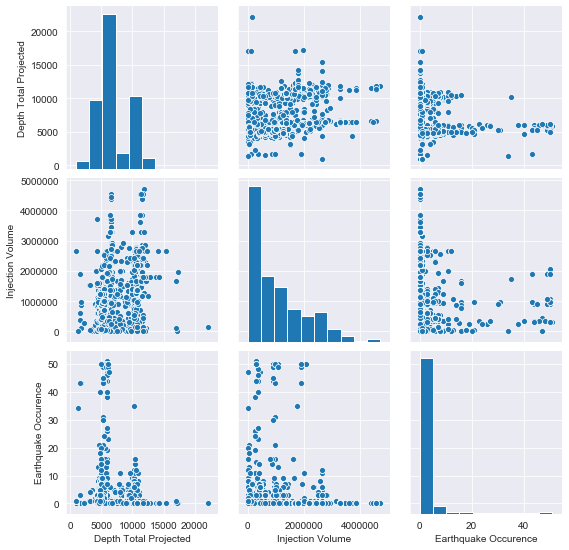

In [125]:
sns.pairplot(data)

In [247]:
data.corr(method='pearson') #pearson

Depth Total Projected  Injection Volume  \
Depth Total Projected               1.000000          0.217871   
Injection Volume                    0.217871          1.000000   
Earthquake Occurence                0.270077          0.322261   

                       Earthquake Occurence  
Depth Total Projected              0.270077  
Injection Volume                   0.322261  
Earthquake Occurence               1.000000

In [248]:
data.corr(method='spearman') #spearman

Depth Total Projected  Injection Volume  \
Depth Total Projected               1.000000          0.337469   
Injection Volume                    0.337469          1.000000   
Earthquake Occurence                0.464384          0.334572   

                       Earthquake Occurence  
Depth Total Projected              0.464384  
Injection Volume                   0.334572  
Earthquake Occurence               1.000000

In [249]:
x = data[['Depth Total Projected', 'Injection Volume']]
y = data[['Earthquake Occurence']]

KeyError: "None of [Index(['well'], dtype='object')] are in the [columns]"

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(model.coef_)
print(model.intercept_)

[[6.52879453e-06]]
[-4.37304377]


In [44]:
pd.DataFrame(np.array(model.coef_).reshape(-1,1), x.columns, columns = ['Coeff'])

Coeff
well  0.000007

In [45]:
predictions = model.predict(x_test)

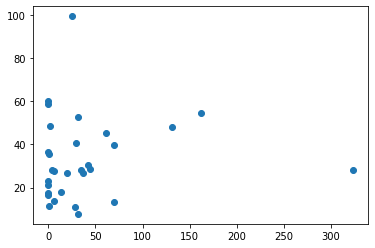

In [46]:
plt.scatter(y_test, predictions)